<a href="https://colab.research.google.com/github/Usharbudha/Deep-Learning-SEM-3/blob/master/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 100

In [ ]:
from keras.datasets import cifar100

(X_train,y_train),(X_test,y_test)=cifar100.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Normalize pixel values to be between 0 and 1
X_train,X_test=X_train/255.0,X_test/255.0

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128,activation='relu'),
tf.keras.layers.Dense(100)
])

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)             

In [ ]:
model.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/30
1563/1563 [==============================] - 54s 34ms/step - loss: 4.5783 - accuracy: 0.0164 - val_loss: 4.4771 - val_accuracy: 0.0328
Epoch 2/30
1563/1563 [==============================] - 55s 35ms/step - loss: 4.2329 - accuracy: 0.0568 - val_loss: 4.0942 - val_accuracy: 0.0701
Epoch 3/30
1563/1563 [==============================] - 54s 35ms/step - loss: 3.9597 - accuracy: 0.0980 - val_loss: 3.8862 - val_accuracy: 0.1092
Epoch 4/30
1563/1563 [==============================] - 54s 35ms/step - loss: 3.7713 - accuracy: 0.1297 - val_loss: 3.6989 - val_accuracy: 0.1461
Epoch 5/30
1563/1563 [==============================] - 55s 35ms/step - loss: 3.6050 - accuracy: 0.1575 - val_loss: 3.6807 - val_accuracy: 0.1499
Epoch 6/30
1563/1563 [==============================] - 60s 39ms/step - loss: 3.4625 - accuracy: 0.1808 - val_loss: 3.4481 - val_accuracy: 0.1878
Epoch 7/30
1563/1563 [==============================] - 61s 39ms/step - loss: 3.3327 - accuracy: 0.2050 - val_loss: 3.3459 -

313/313 - 3s - loss: 2.7025 - accuracy: 0.3553


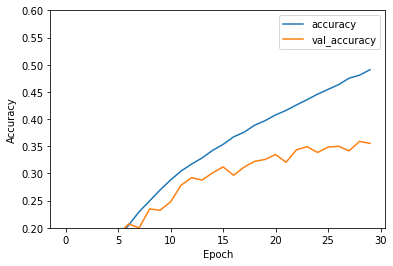

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2,0.6])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# Fashion MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [ ]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

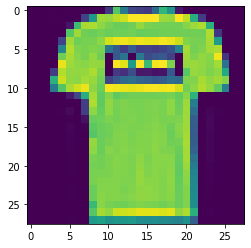

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

In [2]:
initializers=tf.keras.initializers.glorot_normal()

model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

Epoch 1/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6594 - accuracy: 0.7783 - val_loss: 0.4929 - val_accuracy: 0.8268
Epoch 2/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4509 - accuracy: 0.8411 - val_loss: 0.4641 - val_accuracy: 0.8345
Epoch 3/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4025 - accuracy: 0.8580 - val_loss: 0.4605 - val_accuracy: 0.8326
Epoch 4/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3750 - accuracy: 0.8659 - val_loss: 0.4188 - val_accuracy: 0.8507
Epoch 5/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3534 - accuracy: 0.8731 - val_loss: 0.4009 - val_accuracy: 0.8566
Epoch 6/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3361 - accuracy: 0.8788 - val_loss: 0.3766 - val_accuracy: 0.8680
Epoch 7/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3225 - accuracy: 0.8835 - val_loss: 0.3636 -

313/313 - 1s - loss: 0.3050 - accuracy: 0.8921


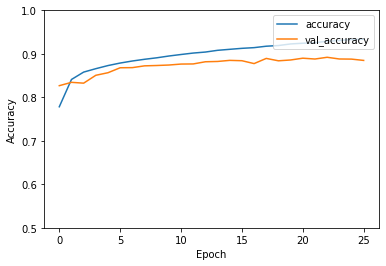

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)

# MNIST

In [6]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.utils import to_categorical

(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train=X_train.reshape(60000,28*28*1)
X_test=X_test.reshape(10000,28*28*1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

#preprocessing
X_train/=255.0
X_test/=255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


initializers=tf.keras.initializers.glorot_normal()
model=tf.keras.models.Sequential([
tf.keras.layers.Dense(1024,input_dim=784,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(512,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(256,kernel_initializer=initializers,bias_initializer=initializers,activation='relu'),
tf.keras.layers.Dense(10,kernel_initializer=initializers,bias_initializer=initializers,activation='softmax')])

#compile
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

cb=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_accuracy',restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),callbacks=[cb])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.5197 - accuracy: 0.8652 - val_loss: 0.2601 - val_accuracy: 0.9267
Epoch 2/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2314 - accuracy: 0.9322 - val_loss: 0.1962 - val_accuracy: 0.9434
Epoch 3/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1756 - accuracy: 0.9496 - val_loss: 0.1594 - val_accuracy: 0.9521
Epoch 4/50
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1409 - accuracy: 0.9594 - val_loss: 0.1300 - val_accuracy: 0.9624
Epoch 5/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1165 - accuracy: 0.9663 - val_loss: 0.1268 - val_accuracy: 0.9619
Epoch 6/50
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0978 - accuracy: 0.9727 - val_loss: 0.0986 - val_accuracy: 0.9695
Epoch 7/50
1875/1875 [==============================] - 25s

313/313 - 1s - loss: 0.0610 - accuracy: 0.9807


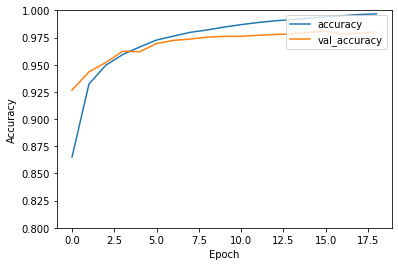

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8,1])
plt.legend(loc='upper right')

test_loss, test_acc = model.evaluate(X_test,y_test, verbose=2)